In [2]:
import os
! git clone https://github.com/martin-marek/parking-space-occupancy
os.chdir('parking-space-occupancy')

fatal: destination path 'parking-space-occupancy' already exists and is not an empty directory.


/home/zazza/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zazza/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


tensor([[  6.2288,  -6.1515],
        [  9.2442, -10.1554],
        [  9.6561, -10.6253],
        [-11.4946,  14.2662]])


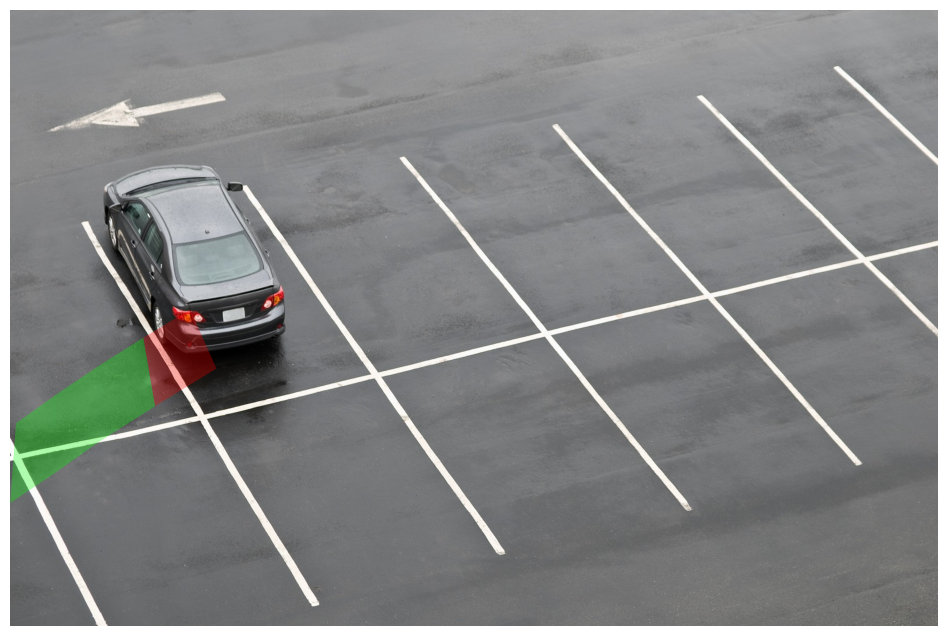

In [4]:
import torch, os, requests
from models.rcnn import RCNN
from utils import transforms, transform_json
from PIL import Image
import numpy as np
from utils import visualize as vis 
import torchvision

# create model
model = RCNN()

# load model weights
weights_path = 'weights.pt'
if not os.path.exists(weights_path):
    r = requests.get('https://storage.googleapis.com/pd-models/RCNN_128_square_gopro.pt')  
    with open(weights_path, 'wb') as f:
        f.write(r.content)
model.load_state_dict(torch.load(weights_path, map_location='cpu'))

# inference
image_path = "./dataset/data/images/ParkProva.jpg"
image = torchvision.io.read_image(image_path)

rois = transform_json.json_to_tensor('./dataset/data/bounding_boxes.json')
rois = transform_json.normalize_tensor_with_image(rois, image_path)

image = transforms.preprocess(image)
with torch.no_grad():
    class_logits = model(image, rois)
    class_scores = class_logits.softmax(1)[:, 1]
vis.plot_ds_image(image, rois, class_scores)